# Gender and Age Detection System using OpenCV

This script provides an implementation for detecting the gender and age of individuals
in a given image. The system uses OpenCV's DNN module to load pre-trained models for
face detection, age classification, and gender classification.

Modules:
- cv2: Required for image processing tasks and DNN module.
- math: Used for mathematical operations (currently not in use but may be needed for future extensions).
- time: Used for timing the execution of code blocks.

Methods:
- getFaceBox: Detects faces in the image and returns bounding boxes around them.
- age_gender_detector: Takes an image as input, detects faces using getFaceBox, and then classifies each face by age and gender.

Pre-trained Models:
- Face Detection: Utilizes a pre-trained model in the OpenCV DNN module.
- Age Classification: Uses a Caffe model trained on the Adience dataset.
- Gender Classification: Uses a Caffe model trained on a custom dataset.

Global Variables:
- MODEL_MEAN_VALUES: Mean values for image normalization.
- ageList: List of age groups for classification.
- genderList: List of genders for classification.

Usage:
- Ensure that all the model files are in the correct directory specified in the code.
- Call the age_gender_detector function and pass an image read via OpenCV as an argument.

Example:
    input_image = cv.imread("path/to/image.jpg")
    output_image = age_gender_detector(input_image)
    cv.imshow("Gender and Age Detection", output_image)

Error Handling:
- The code includes basic error handling for file path issues. More robust handling can be added based on requirements.

## Author: Meet Desai
Last Updated: 31-10-2023


In [9]:
# Import required modules
import cv2 as cv
import matplotlib.pyplot as plt
import math
import time

def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

# Make sure these model paths are correct
faceProto = "models/opencv_face_detector.pbtxt"
faceModel = "models/opencv_face_detector_uint8.pb"

ageProto = "models/age_deploy.prototxt"
ageModel = "models/age_net.caffemodel"

genderProto = "models/gender_deploy.prototxt"
genderModel = "models/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    
    plt.imshow(cv.cvtColor(frameFace, cv.COLOR_BGR2RGB))
    
    return frameFace  # Add this line to return the modified frame

Here's explanation that how you can check it with your images to detect gender and age!
How to Use:
To use your own images for testing, please place (upload) them in the sample_images folder and update the part of the path in the code:


`input = cv.imread("sample_images/your_image_name_here.jpg)"`


By adhering to this folder structure and file path convention, we maintain a clean, organized, and effective codebase, making it easier for both newcomers and experienced developers to understand and contribute.

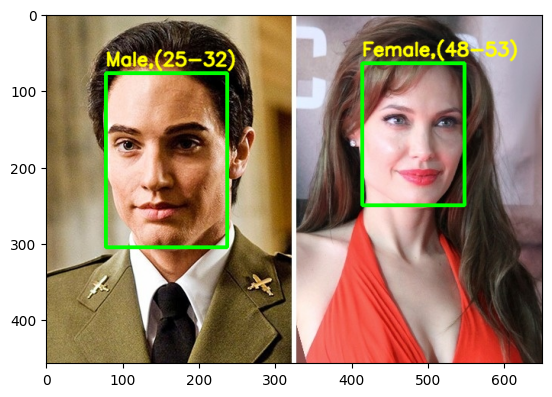

In [10]:
input = cv.imread("sample_images/jolie.jpg")
if input is None:
    print("Image not found or not readable.")
else:
    output = age_gender_detector(input)
    if output is not None:  # Add this check to avoid the error
        plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
        plt.show()
    else:
        print("No output from age_gender_detector.")